In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data= pd.read_csv('input/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# null값 체크
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### 얼마나 많이 살아남았나?
- 1 : Survived, 0 : sorry...

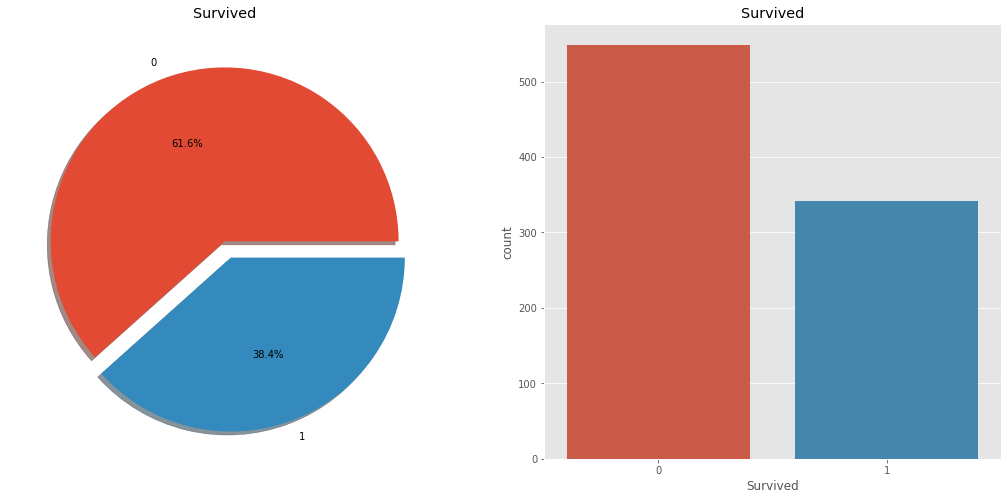

In [5]:
f,ax = plt.subplots(1,2, figsize = (18,8))
data['Survived'].value_counts().plot.pie(explode = [0,0.1],autopct = '%1.1f%%',ax = ax[0],shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data = data,ax = ax[1])
ax[1].set_title('Survived')
plt.show()

891명의 승객 중 오직 350명정도(38.4%)많이 살아남았다.<br>
데이터로부터 인사이트를 더 얻기 위해 좀더 파보자<br>
그래서 다른 Feature을 활용해보자

## Feature의 형태(Type)
- 명목변수, 순서를 가진 변수, 숫자처럼 연속된 형태의 변수<br>
<h3> Kaggle그대로 인용</h3>

<b>Categorical Features</b>:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.
<br><br>
Categorical Features in the dataset: <b> Sex,Embarked.</b>
<br><br>

<b>Ordinal Features:</b>
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.
<br><br>
Ordinal Features in the dataset: <b>PClass</b>
<br><br>

<b>Continous Feature:</b>
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.
<br><br>
Continous Features in the dataset: <b>Age</b>

#### Sex -> Categorical Feature

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

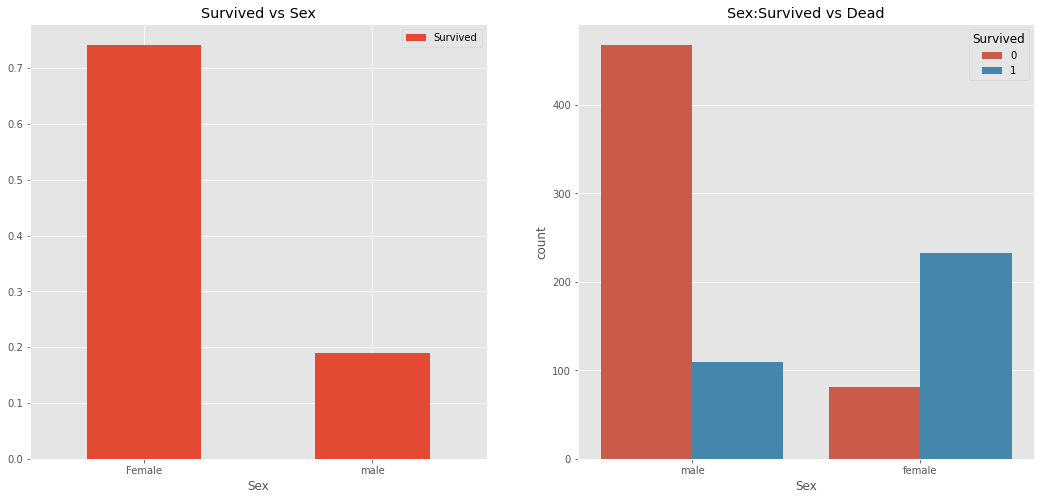

In [7]:
f,ax = plt.subplots(1,2,figsize = (18,8))
data[['Sex','Survived']].groupby(["Sex"]).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
ax[0].set_xticklabels(labels = ["Female","male"],rotation = 0)
sns.countplot('Sex',hue = 'Survived',data = data,ax = ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

ax를 활용한 그래프 세부 표현 참고자료
https://nittaku.tistory.com/117

##### Pclass -> Ordinal Feature

In [8]:
pd.crosstab(data.Pclass,data.Survived,margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [9]:
Pclass_list = list(data.Pclass.value_counts().index)

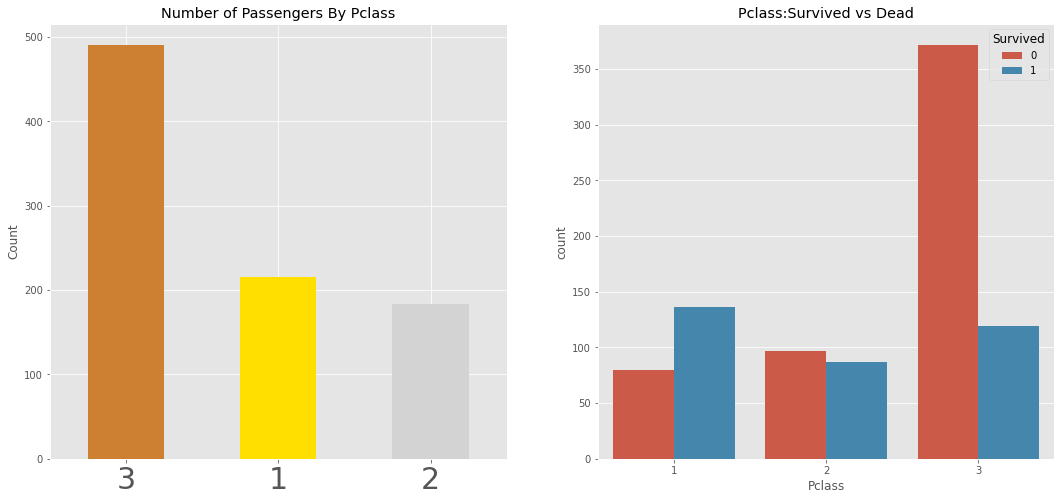

In [10]:
f,ax = plt.subplots(1,2,figsize = (18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title("Number of Passengers By Pclass")
ax[0].set_xticklabels(labels = Pclass_list,fontsize =30,rotation = 0)
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue = 'Survived',data = data,ax = ax[1])
ax[1].set_title("Pclass:Survived vs Dead")
plt.show()

내가 하던 방식

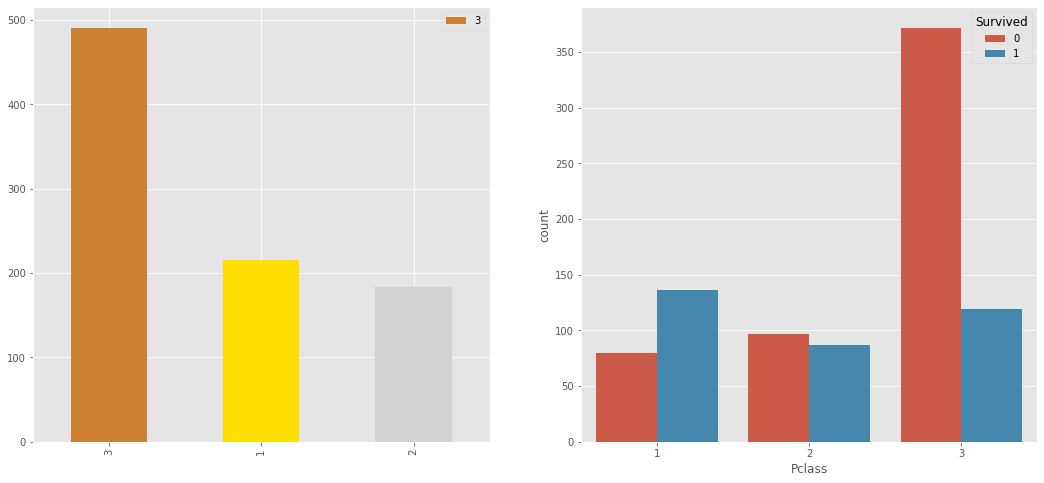

In [11]:
plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'])
plt.legend(data.Pclass.value_counts().index)
plt.subplot(1,2,2)
sns.countplot('Pclass',hue = 'Survived',data = data)

People say Money Can't Buy Everything. <b>But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue.</b> Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1 %survived is around 63% while for Pclass2 is around 48%. So money and status matters. Such a materialistic world.

<b>Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with Sex and Pclass Together</b>

In [12]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap ='summer_r')

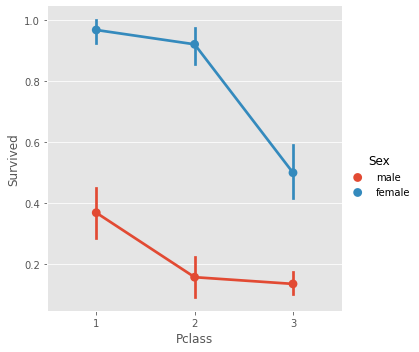

In [13]:
sns.factorplot('Pclass','Survived',hue = "Sex",data= data)
plt.show()

seaborn그래프 참고자료 : https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/

#### Age-> Continous Feature

In [14]:
print('Oldest Passenger was of:',data['Age'].max(),"years")
print('Youngest Passenger was of:',data['Age'].min(),"years")
print('Average Age on the ship:',data['Age'].mean(),"years")

Oldest Passenger was of: 80.0 years
Youngest Passenger was of: 0.42 years
Average Age on the ship: 29.69911764705882 years


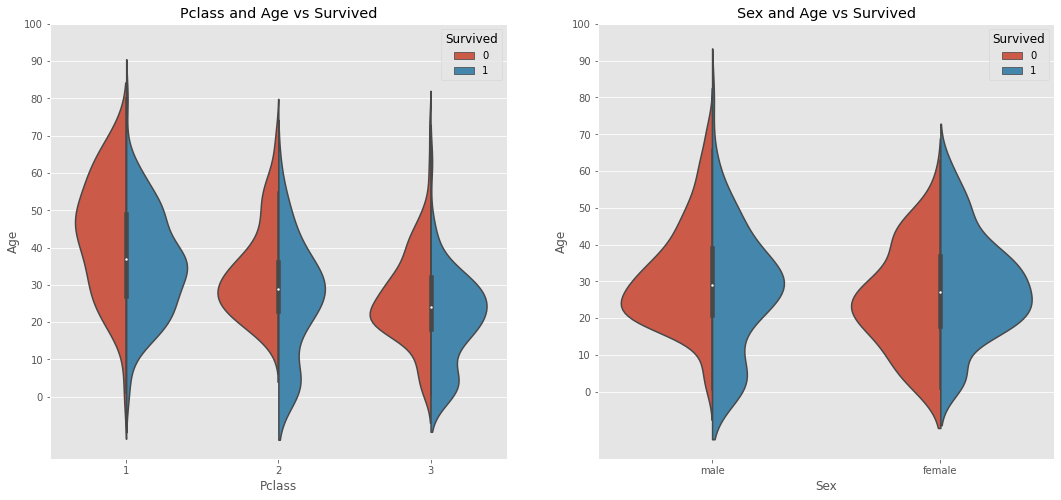

In [15]:
# 버그 발견 ; 그래프 그려놓고 세부적인 사항 추가하자!
f, ax = plt.subplots(1,2,figsize = (18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split = True,ax = ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

<b>Observations:</b><br>
1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.
<br><br>
2)Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.
<br><br>
3)For males, the survival chances decreases with an increase in age.

##### Age 결측값처리
- 나이의 결측값을 처리해야하는데 다양한 나이대를 가진 사람들이 있어,,, 적당한 방법을 생각해야함,
- 그래서 우리는 Name이라는 변수를 확인하자! Mr,Mrs가 있기 때문!!
- Thus we can assign the mean values of Mr and Mrs to the respective groups.

In [16]:
data["Initial"] = 0
for i in data: # 열의 이름들이 출력됨.
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)|.')

버그 발견해서 따로 처리함.

In [17]:
data.Name.str.split(',')
data.Test = data.Name.str.split(',').str[1]

In [18]:
data['Initial'] = data.Test.str.split('.').str[0]

Okay so here we are using the Regex: [A-Za-z]+).. <br>So what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot). So we successfully extract the Initials from the Name.

Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [19]:
Change_dict = {" Master":"Master"," Miss" : "Miss"," Mr" : "Mr",' Mrs' : "Mrs",
                " Mlle" : "Miss", 
               " Mme" : "Miss", 
               " Ms":"Miss",
               " Dr":"Mr",
               " Major":"Mr",
               " Lady":"Mrs",
               " the Countess" : "Mrs",
               " Jonkheer" : "Other",
               " Col" : "Other",
               " Rev" : "Other",
               " Capt" : "Mr",
               " Sir" : "Mr",
               " Don" : "Mr"}

In [20]:
Change_dict.keys()

dict_keys([' Master', ' Miss', ' Mr', ' Mrs', ' Mlle', ' Mme', ' Ms', ' Dr', ' Major', ' Lady', ' the Countess', ' Jonkheer', ' Col', ' Rev', ' Capt', ' Sir', ' Don'])

In [21]:
data['Initial'] = data.Initial.apply(lambda x: Change_dict[x])

In [22]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [23]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

##### 결측값 처리

In [24]:
data.loc[(data.Age.isnull()) & (data.Initial =="Mr"),'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial =="Mrs"),'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial =="Master"),'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial =="Miss"),'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial =="other"),'Age'] = 46

In [25]:
# 결측값 있는 지 여부 확인
data.Age.isnull().any()

False

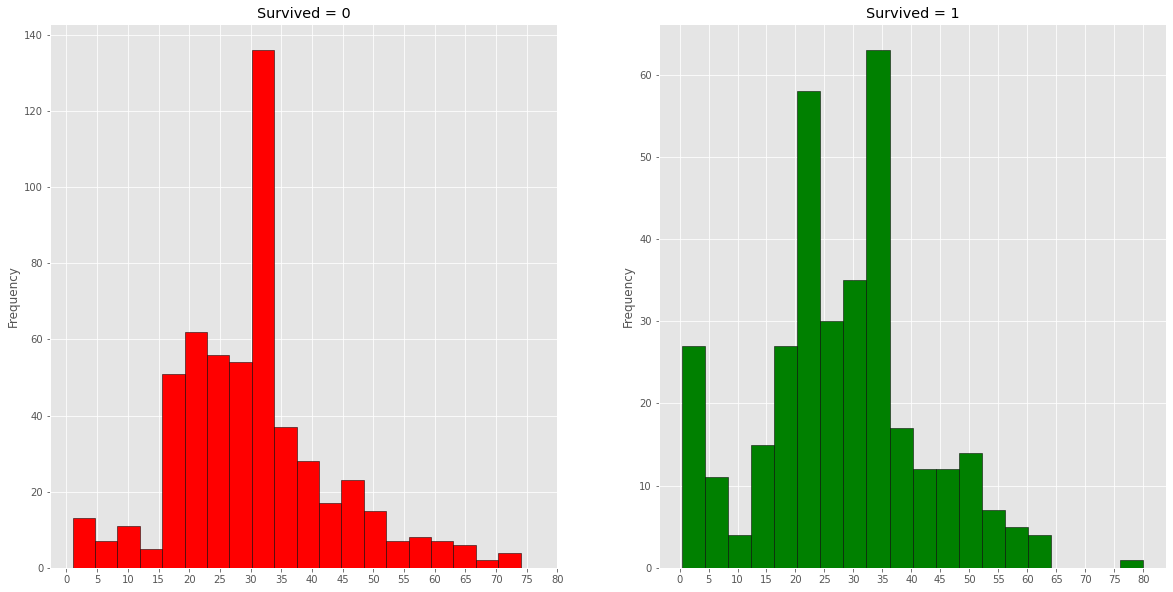

In [26]:
f, ax = plt.subplots(1,2,figsize = (20,10))
data[data['Survived'] == 0].Age.plot.hist(ax = ax[0],bins = 20,edgecolor='black',color = 'red')
ax[0].set_title("Survived = 0")
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived'] == 1].Age.plot.hist(ax = ax[1],color ='green',bins=20,edgecolor='black')
#data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived = 1')
x2= list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

<b>Observations:</b><br>

1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).
<br>

2)The oldest Passenger was saved(80 years).
<br><br>
3)Maximum number of deaths were in the age group of 30-40.

<Figure size 720x2160 with 0 Axes>

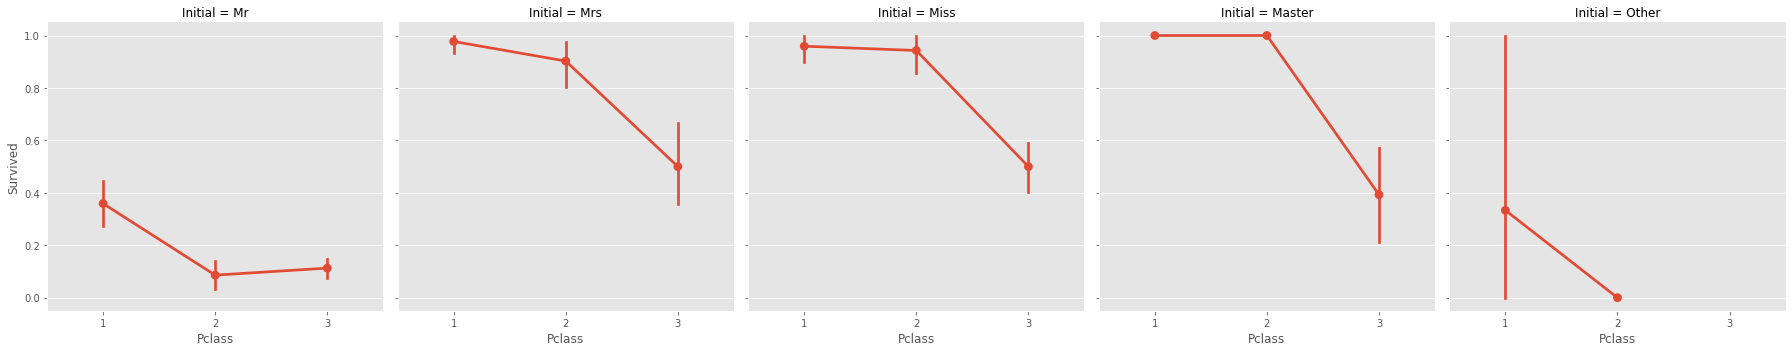

In [27]:
plt.figure(figsize = (10,30))
sns.factorplot("Pclass",'Survived',col = 'Initial',data =data)
plt.show()

The Women and Child first policy thus holds true irrespective of the class.

### Embarked -> Categorical values

In [28]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins =True).style.background_gradient(cmap = 'summer_r')

## Chances for Survival by Port Of Embarkation

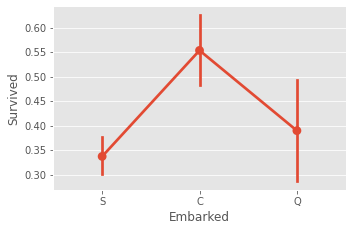

In [29]:
sns.factorplot('Embarked','Survived',data= data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

- plt.gcf() : 현재 figure에 접근해야할 필요성이 있다면 이 함수로 접근
- size조절하고 싶은면 fig.set_size_inches(18,3)
- 그래프 참고자료 : https://zzsza.github.io/development/2018/08/24/data-visualization-in-python/

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

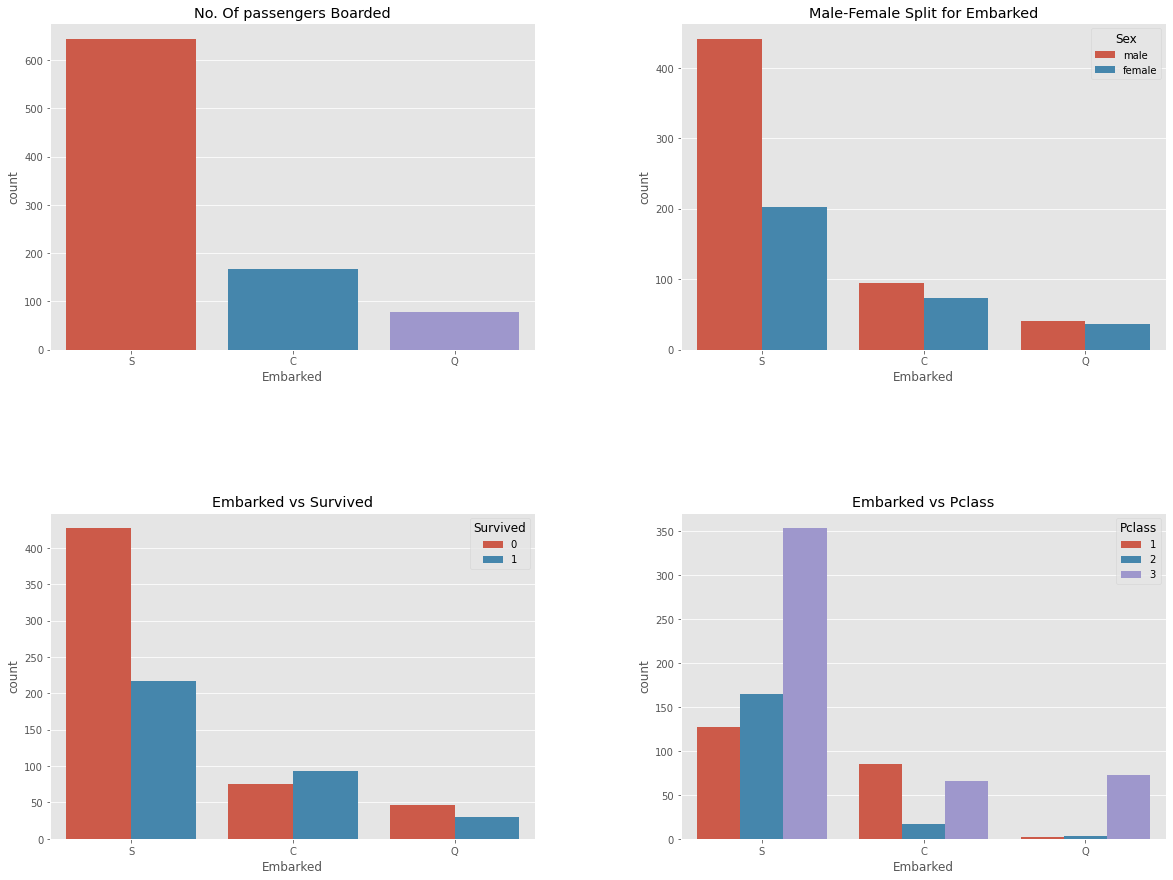

In [30]:
f, ax = plt.subplots(2,2,figsize = (20,15))
sns.countplot("Embarked",data = data,ax = ax[0,0])
ax[0,0].set_title('No. Of passengers Boarded')
sns.countplot("Embarked",hue = 'Sex',data =data,ax = ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue = "Survived",data = data,ax =ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot("Embarked",hue = "Pclass",data =data, ax = ax[1,1])
ax[1,1].set_title("Embarked vs Pclass")
plt.subplots_adjust(wspace = 0.3,hspace = 0.5) # 4개 그래프 빈 공백 조정
plt.show()

<b>Observations:</b><br>
1)Maximum passenegers boarded from S. Majority of them being from Pclass3.
<br>

2)The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.
<br>
    
3)The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.
<br>

4)Port Q had almost 95% of the passengers were from Pclass3.

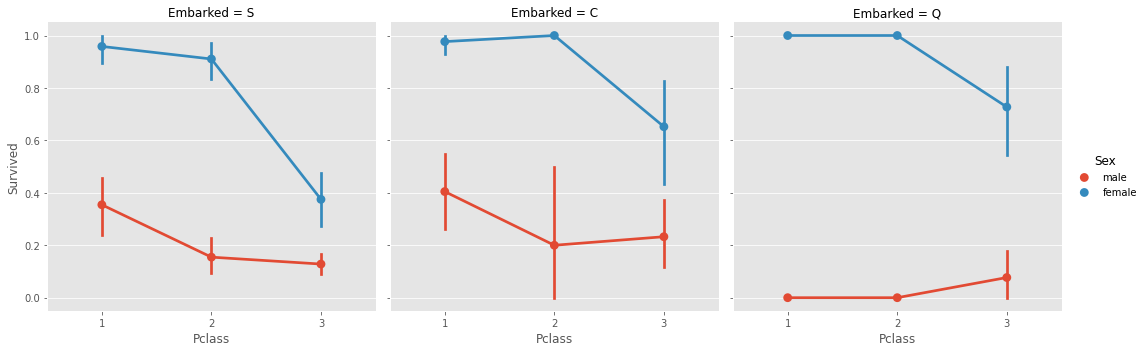

In [31]:
sns.factorplot('Pclass','Survived',hue = "Sex",col = 'Embarked',data = data)
plt.show()

<b>Observations:</b><br>
1)The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.


2)Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is very low.(Money Matters)


3)Port Q looks looks to be unlukiest for Men, as almost all were from Pclass 3.

In [32]:
# 결측값 처리
data["Embarked"].fillna('S',inplace = True)

In [33]:
data.Embarked.isnull().any()

False

### SibSip -> Discrete Feature

This feature represents whether a person is alone or with his family members.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [34]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


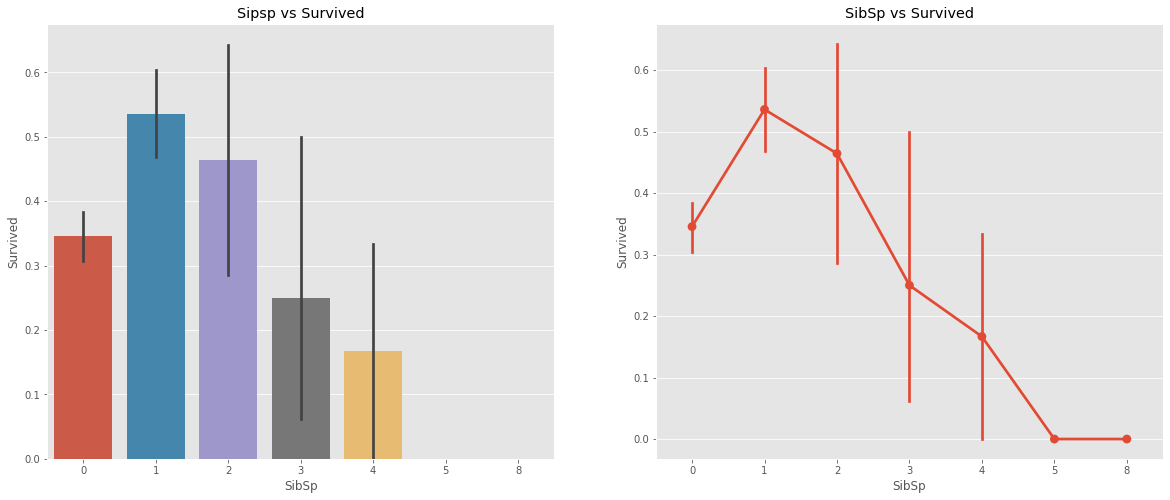

In [35]:
f, ax = plt.subplots(1,2,figsize = (20,8))
sns.barplot("SibSp","Survived",data = data,ax =ax[0])
ax[0].set_title("Sipsp vs Survived")
sns.factorplot('SibSp','Survived',data = data,ax = ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2) # 첫번째 그림 닫기 비록 두번쨰 그림이 활성화되있더라도..
plt.show()

In [36]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


<b>Observations:</b><br>
The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass??

The reason is Pclass. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

## Parch
-SipSp는 배우자나 형제 자매 명 수의 총 합
-Parch는 부모 자식 명 수의 총 합을 나타낸다.

In [37]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


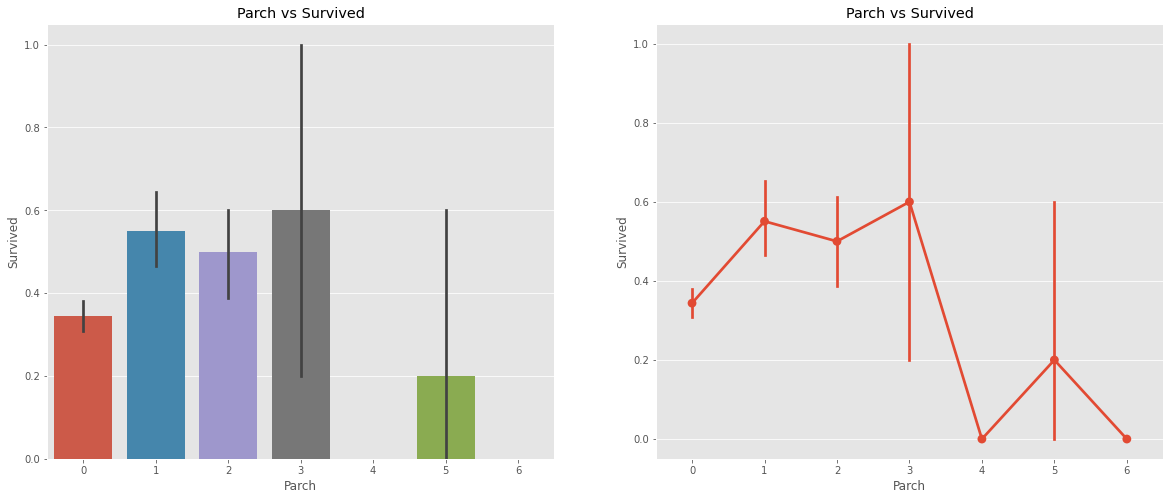

In [38]:
f, ax = plt.subplots(1,2,figsize = (20,8))
sns.barplot('Parch','Survived',data = data,ax = ax[0])
ax[0].set_title("Parch vs Survived")
sns.factorplot('Parch',"Survived",data =data,ax = ax[1])
ax[1].set_title("Parch vs Survived")
plt.close(2)
plt.show()

<b>Observations:</b><br>
Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

## Fare -> Continous Feature

In [39]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


In [40]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

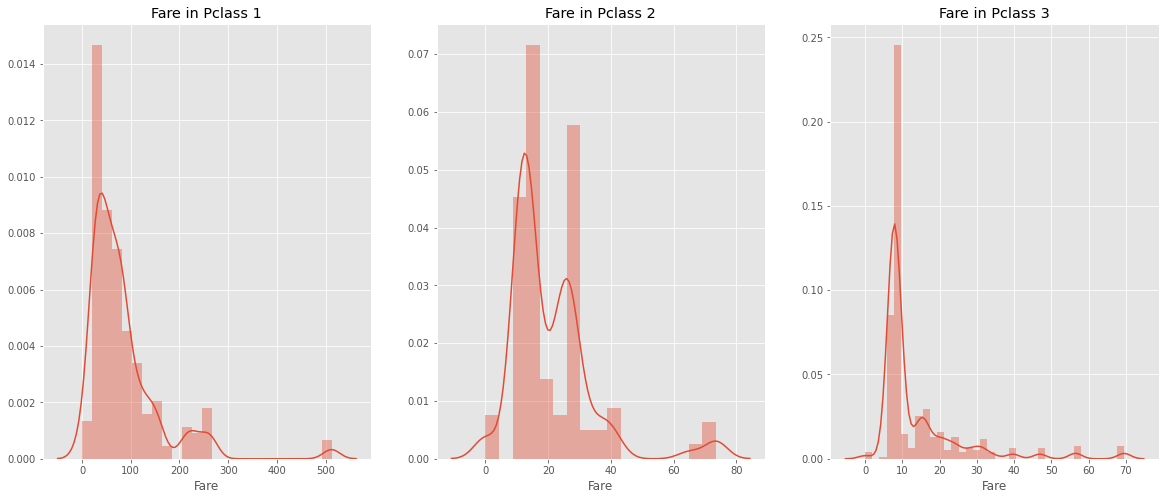

In [41]:
f,ax = plt.subplots(1,3,figsize = (20,8))
sns.distplot(data[data["Pclass"]==1].Fare,ax =ax[0])
ax[0].set_title('Fare in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax = ax[1])
ax[1].set_title('Fare in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax = ax[2])
ax[2].set_title("Fare in Pclass 3")
plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

## Observations in a Nutshell for all features:
<b>Sex</b>: The chance of survival for women is high as compared to men.

<b>Pclass</b>:There is a visible trend that being a <b>1st class passenger</b> gives you better chances of survival. The survival rate for <b>Pclass3 is very low</b>. For <b>women</b>, the chance of survival from <b>Pclass1</b> is almost 1 and is high too for those from <b>Pclass2</b>. <b>Money Wins!!!.</b>

<b>Age</b>: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

<b>Embarked</b>: This is a very interesting feature. <b>The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S</b>. Passengers at Q were all from <b>Pclass3</b>.

<b>Parch+SibSp</b>: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with yo

## Feature간의 상관관계

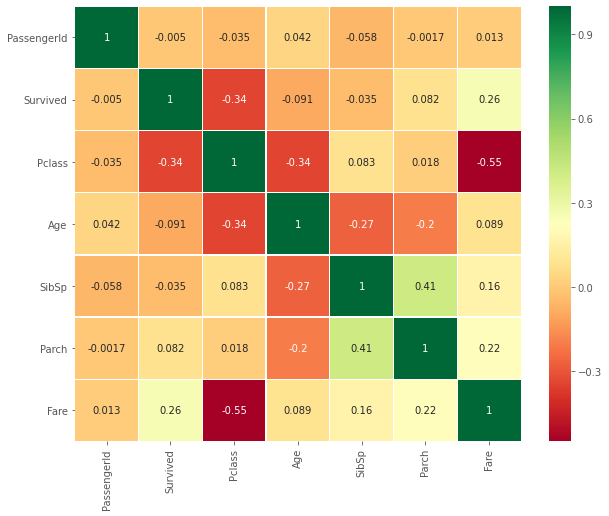

In [42]:
sns.heatmap(data.corr(),annot = True, cmap = 'RdYlGn',linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

<h2>Interpreting The Heatmap</h2><br>
The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

<b>POSITIVE CORRELATION</b>: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

<b>NEGATIVE CORRELATION</b>: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as <b>MultiColinearity</b> as both of them contains almost the same information.

So do you think we should use both of them as <b>one of them is redundant</b>. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between <b>SibSp and Parch i.e 0.41</b>. So we can carry on with all features.

## Feature Engineering and Data Cleaning

Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

### Age_band

As I have mentioned earlier that <b>Age is a continous feature</b>, there is a problem with Continous Variables in Machine Learning Models.

<b>Eg</b>:If I say to group or arrange Sports Person by <b>Sex</b>, We can easily segregate them by Male and Female.

Now if I say to group them by their <b>Age</b>, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these <b>continous values into categorical values</b> by either <b>Binning or Normalisation.</b> <b>I will be using binning</b> i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.

In [43]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16,'Age_band'] = 0
data.loc[(data['Age']>16)&(data["Age"]<=32),'Age_band'] = 1
data.loc[(data['Age']>32)&(data["Age"]<=48),'Age_band'] = 2
data.loc[(data['Age']>48)&(data["Age"]<=64),'Age_band'] = 3
data.loc[(data['Age']>64),'Age_band'] = 4

In [44]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [45]:
# 1개 Series를 표형태로 만드는 것은 to_frame()
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


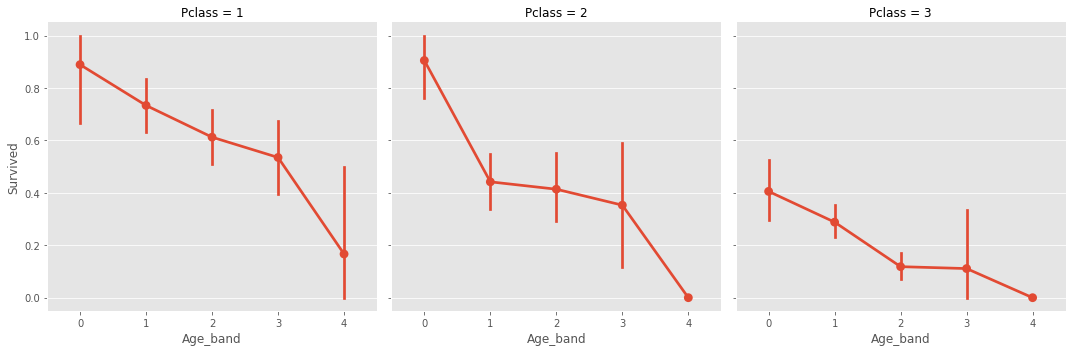

In [46]:
sns.factorplot('Age_band',"Survived",data = data,col = 'Pclass')
plt.show()

True that..the survival rate decreases as the age increases irrespective of the Pclass.

## Family_size and Alone

At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. 

<b>This feature is the summation of Parch and SibSp. </b>

It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. 

Alone will denote whether a passenger is alone or not.

In [47]:
data['Family_Size'] = 0
data['Family_Size'] = data["Parch"] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size ==0,'Alone'] = 1 # alone 이면 1 입력

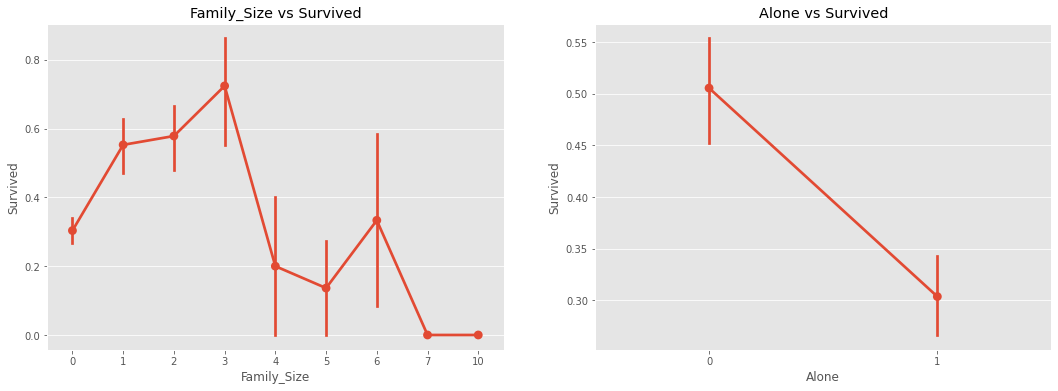

In [48]:
f,ax = plt.subplots(1,2,figsize = (18,6))
sns.factorplot('Family_Size','Survived',data =data, ax = ax[0])
ax[0].set_title("Family_Size vs Survived")
sns.factorplot('Alone','Survived', data= data, ax = ax[1])
ax[1].set_title("Alone vs Survived")
plt.close(2)
plt.close(3)
plt.show()

<b>Family_Size=0 means that the passeneger is alone. </b>

Clearly, if you are alone or family_size=0,then chances for survival is very low. 

For family size > 4,the chances decrease too.

This also looks to be an important feature for the model. Lets examine this further.

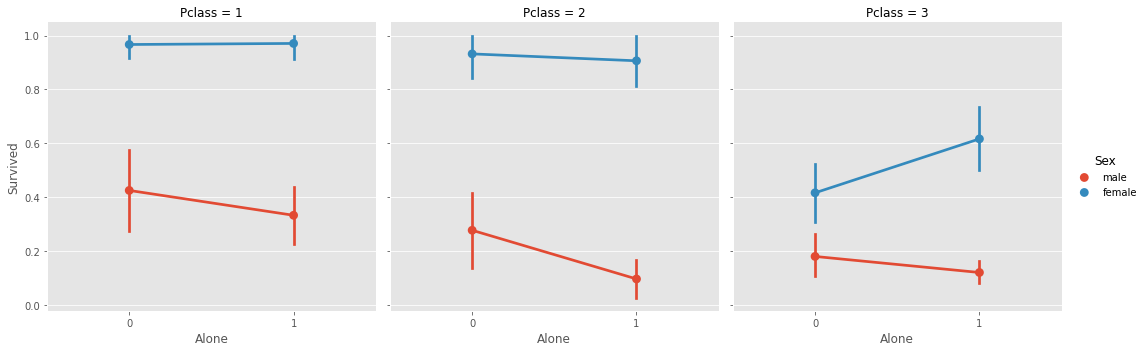

In [49]:
sns.factorplot('Alone','Survived',data =data, hue = "Sex",col = 'Pclass')
plt.show()

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

## Fare_Range

Since fare is also a continous feature, we need to convert it into ordinal value. 

For this we will use <h2>pandas.qcut.</h2>

So <b>what qcut does is it splits or arranges the values according the number of bins we have passed. </b><br>So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [50]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As discussed above, we can clearly see that <b> as the fare_range increases, the chances of survival increases.</b>
<br>

<b>Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band</b>

In [51]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91,'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat'] = 2
data.loc[(data['Fare']>31)&(data['Fare']<=513),"Fare_cat"] = 3

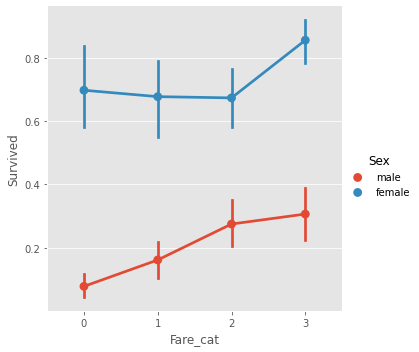

In [52]:
sns.factorplot('Fare_cat','Survived',data = data,hue = 'Sex')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

In [53]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace =True)

In [54]:
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

<h3>Dropping UnNeeded Features</h3>

<b>Name</b>--> We don't need name feature as it cannot be converted into any categorical value.

<b>Age</b>--> We have the Age_band feature, so no need of this.

<b>Ticket</b>--> It is any random string that cannot be categorised.

<b>Fare</b>--> We have the Fare_cat feature, so unneeded

<b>Cabin</b>--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

<b>Fare_Range</b>--> We have the fare_cat feature.

<b>PassengerId</b>--> Cannot be categorised.

In [55]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis = 1,inplace =True)

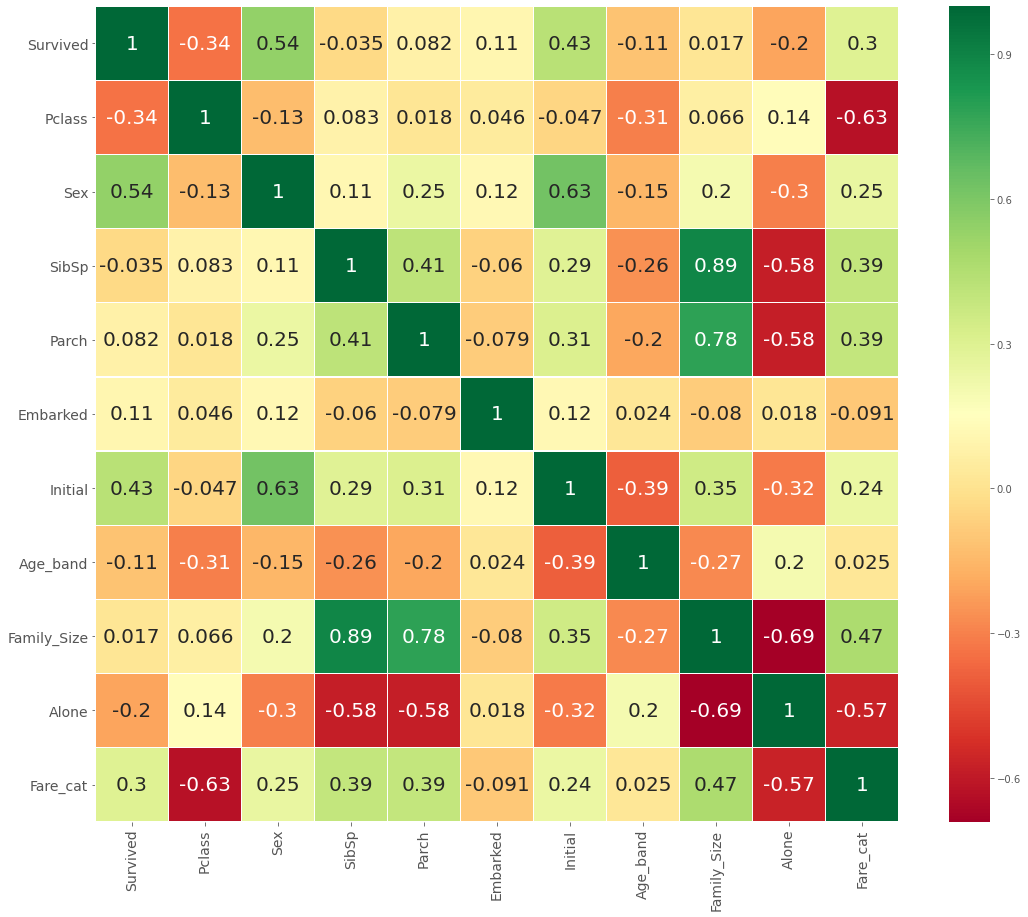

In [56]:
sns.heatmap(data.corr(),annot = True,cmap = 'RdYlGn',linewidths = 0.2,annot_kws={'size' : 20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being <b>SibSp andd Family_Size and Parch and Family_Size</b> and some negative ones like <b>Alone and Family_Size.</b>

# Predictive Modeling


We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.Following are the algorithms I will use to make the model:

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [58]:
train,test= train_test_split(data,test_size = 0.3,random_state = 3,stratify = data["Survived"])
# train1,test2= train_test_split(data,test_size = 0.3,random_state = 1)

- stratify는 훈련/테스트 데이터들이 원래의 input dataset의 클래스의 비율과 같은 비율을 가지도록 할 것인지 지정한다. 예를 들어 0,1의 클래스가 input dataset에 20:80 비율로 있었다면 훈련 데이터와 테스트 데이터 역시 각각의 클래스가 같은 비율로 있도록 지정할 수 있다. 
- 참고자료 : https://rfriend.tistory.com/520

In [59]:
train.Survived.value_counts()

0    384
1    239
Name: Survived, dtype: int64

In [60]:
test.Survived.value_counts()

0    165
1    103
Name: Survived, dtype: int64

In [61]:
train

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
649,1,3,1,0,0,0,2,1,0,1,0
185,0,1,0,0,0,0,0,2,0,1,3
615,1,2,1,1,2,0,2,1,3,0,3
715,0,3,0,0,0,0,0,1,0,1,0
125,1,3,0,1,0,1,3,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
702,0,3,1,0,1,1,2,1,1,0,2
24,0,3,1,3,1,0,2,0,4,0,2
209,1,1,0,0,0,1,0,2,0,1,2
79,1,3,1,0,0,0,2,1,0,1,1


In [68]:
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X=data[data.columns[1:]]
Y = data['Survived']

##### Radial Support Vector Machines(rbf-SVM)

In [69]:
model = svm.SVC(kernel ='rbf',C = 1,gamma = 0.1)
model.fit(train_X,train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is',metrics.accuracy_score(test_Y,prediction1.round()))

Accuracy for rbf SVM is 0.8470149253731343


##### Linear Support Vector Machine(linear-SVM)

In [71]:
model = svm.SVC(kernel='linear',C = 0.1,gamma = 0.1)
model.fit(train_X,train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(test_Y,prediction2))

Accuracy for linear SVM is 0.8432835820895522


##### Logistic Regression

In [73]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression is',metrics.accuracy_score(test_Y,prediction3))

Accuracy for Logistic Regression is 0.835820895522388


##### Decision Tree

In [75]:
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4 = model.predict(test_X)
print('the accuracy of the Decision Tree is',metrics.accuracy_score(test_Y,prediction4))

the accuracy of the Decision Tree is 0.835820895522388


##### K-Nearest Neighbours(KNN)

In [77]:
model = KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5 = model.predict(test_X)
print('the accuracy of the KNN is',metrics.accuracy_score(test_Y,prediction5))

the accuracy of the KNN is 0.8470149253731343


Now the accuracy for the KNN model changes as we change the values for <b>n_neighbours attribute.</b>
<br>The default value is 5. Lets check the accuracies over various values of n_neighbours.

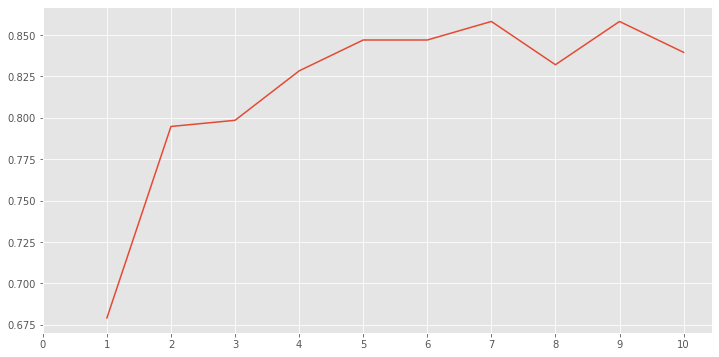

Accuracies for different values of n are :  [0.67910448 0.79477612 0.79850746 0.82835821 0.84701493 0.84701493
 0.85820896 0.83208955 0.85820896 0.83955224] with the max valeus as 0.8582089552238806


In [79]:
a_index = list(range(1,11))
a=pd.Series()
x=[i for i in range(11)]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X,train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(test_Y,prediction)))
plt.plot(a_index,a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are : ',a.values,'with the max valeus as',a.values.max())

##### Gaussian Naive Bayes

In [80]:
model = GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('the accuracy of the NaiveBayes is',metrics.accuracy_score(test_Y,prediction6))

the accuracy of the NaiveBayes is 0.832089552238806


Random Forest

In [83]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('the accuracy of the Random Forest is',metrics.accuracy_score(test_Y,prediction7))

the accuracy of the Random Forest is 0.8582089552238806


The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is <b>No</b>, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as <b>model variance.</b>

To overcome this and get a generalized model,we use <b>Cross Validation.</b>

<h2>Cross Validation</h2>

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [88]:
kfold = KFold(n_splits = 10,random_state = 22)
# k = 10, split the data into 10 equal parts
xyz =[]
accuracy = []
std = []
classifiers = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(),
          KNeighborsClassifier(n_neighbors=9),
          DecisionTreeClassifier(),
         GaussianNB(),
         RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y,cv = kfold,scoring = 'accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({"CV Mean":xyz,"Std":std},index = classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.806991,0.024719
Naive Bayes,0.801386,0.028999
Random Forest,0.814881,0.035507


In [92]:
box.T

,Linear Svm,Radial Svm,Logistic Regression,KNN,Decision Tree,Naive Bayes,Random Forest
0,0.811111,0.822222,0.800000,0.733333,0.777778,0.766667,0.755556
1,0.831461,0.876404,0.820225,0.876404,0.831461,0.764045,0.842697
2,0.752809,0.786517,0.775281,0.775281,0.786517,0.786517,0.764045
3,0.876404,0.876404,0.831461,0.831461,0.820225,0.831461,0.820225
4,0.775281,0.808989,0.797753,0.831461,0.808989,0.775281,0.842697
5,0.808989,0.820225,0.786517,0.831461,0.775281,0.831461,0.820225
6,0.741573,0.797753,0.797753,0.808989,0.820225,0.820225,0.820225
7,0.730337,0.786517,0.797753,0.775281,0.775281,0.775281,0.775281
8,0.853933,0.876404,0.853933,0.865169,0.842697,0.842697,0.865169
9,0.752809,0.831461,0.797753,0.808989,0.831461,0.820225,0.842697


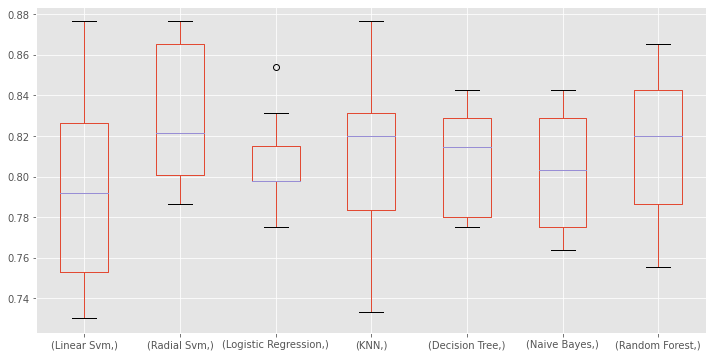

In [90]:
plt.subplots(figsize = (12,6))
box = pd.DataFrame(accuracy,index = [classifiers])
box.T.boxplot()

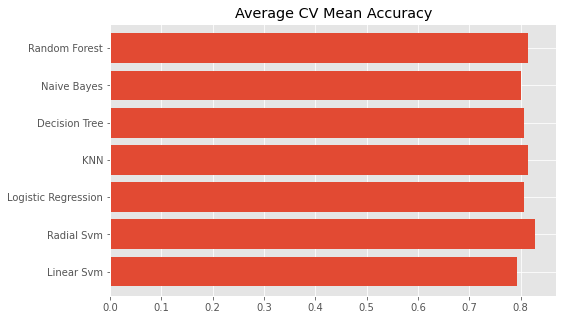

In [94]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

## Confusion Matrix

It gives the number of correct and incorrect classifications made by the classifier.

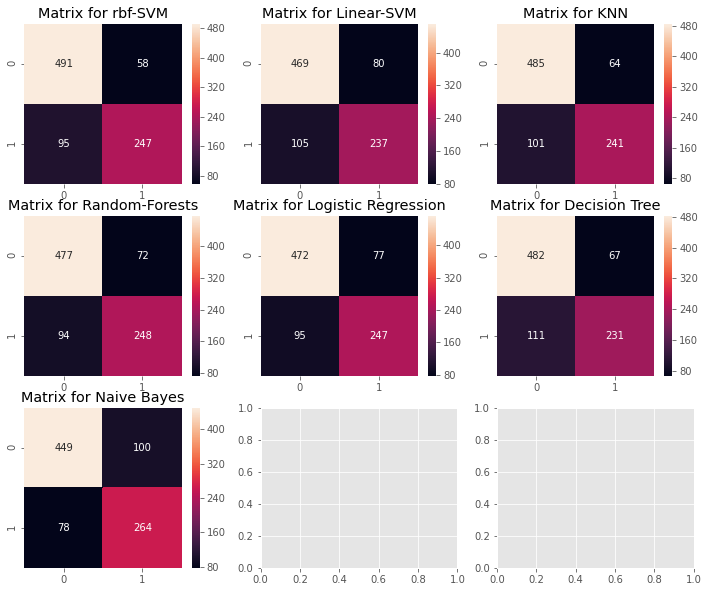

In [96]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

<h2>Interpreting Confusion Matrix</h2>
<br>
The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for rbf-SVM:

1)The no. of correct predictions are <b>491(for dead) + 247(for survived)</b> with the mean CV accuracy being <b>(491+247)/891 = 82.8%</b> which we did get earlier.

2)<b>Errors</b>--> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

## Hyper-Parameters Tuning

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

##### SVM

In [97]:
from sklearn.model_selection import GridSearchCV

In [110]:
C = np.arange(0.05,1.05,0.05)
gamma = np.arange(0.1,1.1,0.1)
kernel = ['rbf','linear']
hyper = {'kernel':kernel,'C':C,'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(),param_grid = hyper,verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   24.0s finished


##### Random Forest

In [112]:
n_estimators = np.arange(100,1000,100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state = 0),param_grid=hyper,verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   23.6s finished


0.8170594837261503
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


The best score for Rbf-Svm is 82.82% with C=0.05 and gamma=0.1. 

For RandomForest, score is abt 81.8% with n_estimators=900.

<h1>Ensembling</h1>
Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is Ensembling, which improves the stability of the model. Ensembling can be done in ways like:

1)Voting Classifier

2)Bagging

3)Boosting.

### Voting Classifier

It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are <b>all of diiferent types.</b>

In [113]:
from sklearn.ensemble import VotingClassifier

In [114]:
ensemble_lin_rbf = VotingClassifier(estimators=[
    ('KNN',KNeighborsClassifier(n_neighbors=9)),
    ('RBF',svm.SVC(probability=True)),
    ('RFor',RandomForestClassifier(n_estimators = 900,random_state = 0)),
    ('DT',DecisionTreeClassifier(random_state=0)),
    ('NB',GaussianNB()),
    ('svm',svm.SVC(kernel='linear',probability = True)) 
],voting = 'soft').fit(train_X,train_Y)

SVM probability 에 대한 참고자료 : https://analysis-flood.tistory.com/99

앙상블 voting 관련 참고자료 : https://datascienceschool.net/view-notebook/766fe73c5c46424ca65329a9557d0918/

In [117]:
print('the accuracy for ensembled model is :',ensemble_lin_rbf.score(test_X,test_Y))
cross = cross_val_score(ensemble_lin_rbf,X,Y,cv = 10,scoring ='accuracy')
print('The cross validated scores is',cross.mean())

the accuracy for ensembled model is : 0.835820895522388
The cross validated scores is 0.8271620701395982


<h1>Bagging</h1>
Bagging is a general ensemble method. 

It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions.

<b>Due to the averaging,there is reduction in variance. </b>
    
Unlike Voting Classifier, Bagging makes use of <b>similar classifiers.</b>

##### Bagged KNN

Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n_neighbours, as small value of n_neighbours.

In [118]:
from sklearn.ensemble import BaggingClassifier

In [119]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors = 3),random_state = 0,n_estimators = 700)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)

In [120]:
print('the accuracy of bagged KNN is',metrics.accuracy_score(test_Y,prediction))

the accuracy of bagged KNN is 0.8470149253731343


In [122]:
result = cross_val_score(model,X,Y,cv = 10,scoring = 'accuracy')
print('The cross validated score for bagged KNN is : ',result.mean())

The cross validated score for bagged KNN is :  0.8148893428668709


##### Bagged Decistion Tree

In [123]:
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(),random_state = 0,n_estimators=100)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)

In [124]:
print('the accuracy of bagged Descision Tree is :',metrics.accuracy_score(test_Y,prediction))

the accuracy of bagged Descision Tree is : 0.8507462686567164


In [126]:
result = cross_val_score(model,X,Y,cv = 10,scoring='accuracy')
print('The cross validated score for bagged Descision Tree is : {}'.format(result.mean()))

The cross validated score for bagged Descision Tree is : 0.8204826353421859


## Boosting

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

##### AdaBoost(Adaptive Boosting)

The weak learner or estimator in this case is a Decsion Tree. But we can change the dafault base_estimator to any algorithm of our choice.

In [127]:
from sklearn.ensemble import AdaBoostClassifier

In [128]:
ada = AdaBoostClassifier(n_estimators=200,random_state = 0,learning_rate=0.1)
result = cross_val_score(ada,X,Y,cv = 10,scoring = 'accuracy')
print('The cross valided score of AdaBoost is:',result.mean())

The cross valided score of AdaBoost is: 0.8249526160481218


<b>Stochastic Gradient Boosting</b><br>
Here too the weak learner is a Decision Tree.

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

In [130]:
grad = GradientBoostingClassifier(n_estimators=500,random_state = 0,learning_rate=0.1)
result = cross_val_score(grad,X,Y,cv = 10,scoring = 'accuracy')
print('The cross validated score for Gradient Boosting is :',result.mean())

The cross validated score for Gradient Boosting is : 0.8182862331176939


`XGboost

In [131]:
import xgboost as xg

In [132]:
xgboost = xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result = cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8104710021563954


##### 하이퍼 파라미터 튜닝

In [136]:
n_estimators = np.arange(100,1100,100)
learning_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9]
hyper = {"n_estimators":n_estimators,'learning_rate': learning_rate}

In [137]:
gd = GridSearchCV(estimator=AdaBoostClassifier(),param_grid = hyper,verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 110 candidates, totalling 330 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:  6.2min finished


0.8316498316498316
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=200, random_state=None)


The maximum accuracy we can get with AdaBoost is 83.16% with n_estimators=200 and learning_rate=0.05

##### Confusion Matrix for the Best Model

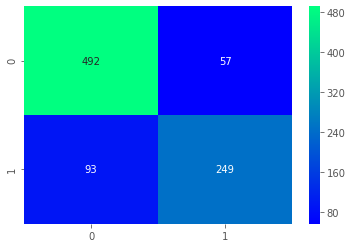

In [140]:
ada =AdaBoostClassifier(n_estimators = 200,random_state = 0,learning_rate = 0.05)
result = cross_val_predict(ada,X,Y,cv = 10)
sns.heatmap(confusion_matrix(Y,result),cmap = 'winter',annot =True,fmt = '2.0f')
plt.show()

## Feature Importance

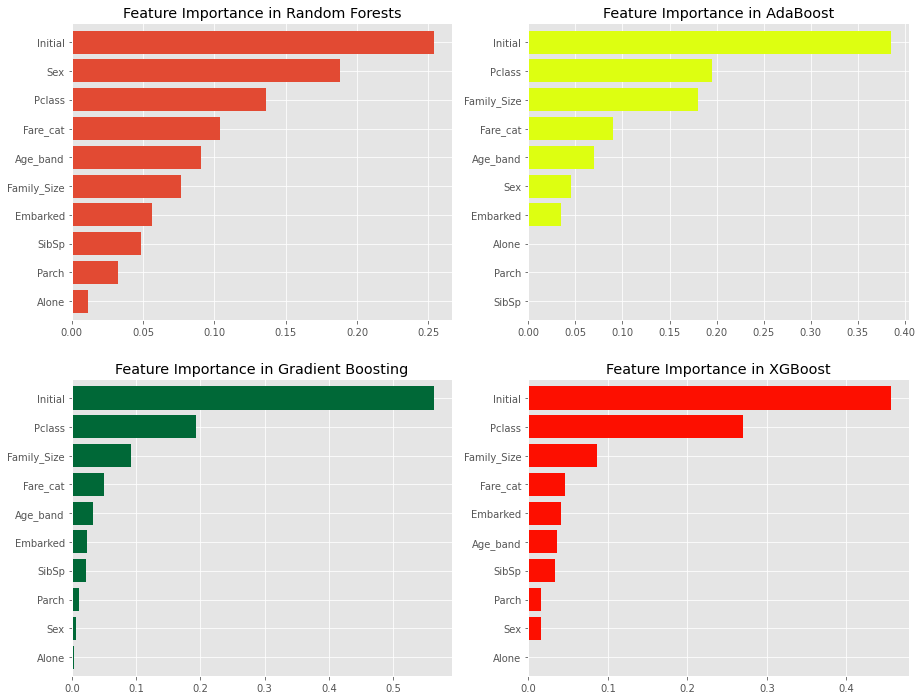

In [146]:
f,ax = plt.subplots(2,2,figsize = (15,12))
model1 = RandomForestClassifier(n_estimators = 500,random_state = 0)
model1.fit(X,Y)
pd.Series(model1.feature_importances_,X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model2 = AdaBoostClassifier(n_estimators = 200,learning_rate = 0.05,random_state = 0)
model2.fit(X,Y)
pd.Series(model2.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax = ax[0,1],color = '#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model3 = GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state = 0)
model3.fit(X,Y)
pd.Series(model3.feature_importances_,X.columns).sort_values(ascending = True).plot.barh(width=0.8,ax = ax[1,0],cmap = "RdYlGn_r")
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model4 = xg.XGBClassifier(n_estimators=800,learning_rate=0.05)
model4.fit(X,Y)
pd.Series(model4.feature_importances_,X.columns).sort_values(ascending = True).plot.barh(width = 0.8,ax = ax[1,1],color = '#FD0F00')
ax[1,1].set_title('Feature Importance in XGBoost')
plt.show()

##### 추가

In [147]:
param = {
    "n_estimators" : 800,
    'max_depth' : 3,
    'learning_rate' : 0.1
}

In [148]:
model5= xg.XGBClassifier(**param)

In [149]:
model5.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=800, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

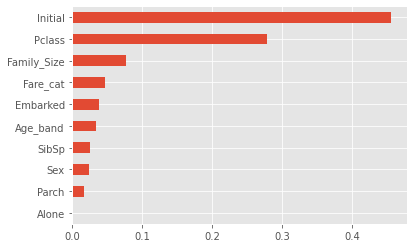

In [156]:
pd.Series(model5.feature_importances_,X.columns).sort_values(ascending= True).plot.barh()

In [157]:
n_estimators = np.arange(500,1100,100)
max_depth = np.arange(3,6,1)
learning_rate = np.arange(0.05,0.45,0.05)
booster = ['gbtree','gblinear','dart']
hyper = {'n_estimators':n_estimators,'max_depth' : max_depth,'learning_rate':learning_rate,'booster':booster}

In [159]:
gd = GridSearchCV(estimator=xg.XGBClassifier(),param_grid=hyper,verbose = True)
gd.fit(X,Y)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 